# Web Mining Theory Digital Assignment

# Submitted By:

# Devang Mehrotra (18BCE0763)
# Chitresh Kansal (18BCE0760)

# Group:4

# Q1:

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Importing Files

In [3]:
titles = []
data = []
#Please specify path according to the system 
for i in os.listdir('.\Health-Tweets'):
    if i.endswith('.txt'):
        titles.append(i)
        with open(".\Health-Tweets\\" + str(i), 'r+',encoding='utf-8',errors='ignore') as text:
            data.append(text.read()) 

# Stop word Removal and Lemmatization 

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = SnowballStemmer('english') 

In [5]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [6]:
def tokenize(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [7]:
totalvocab_stemmed = []
totalvocab_tokenized = []

for i in data:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize(i)
    totalvocab_tokenized.extend(allwords_tokenized)

vocab = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab.iloc[3]

words    cancer
Name: cancer, dtype: object

# TF-IDF 

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,min_df=0.2, stop_words='english',use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
%time tfidf_matrix = tfidf_vectorizer.fit_transform(data)

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 42 s


In [9]:
terms = tfidf_vectorizer.get_feature_names()
dist = 1 - cosine_similarity(tfidf_matrix)

# 1) Hierarchical Clustering 

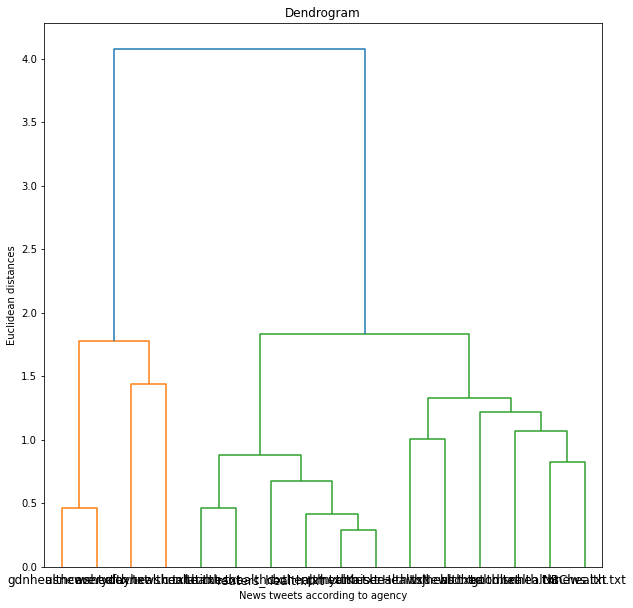

<Figure size 432x288 with 0 Axes>

In [14]:
X = ward(dist)
fig, ax = plt.subplots(figsize=(10, 10)) # set size
ax = dendrogram(X,labels=titles);
plt.title('Dendrogram')
plt.xlabel('News tweets according to agency')
plt.ylabel('Euclidean distances')
plt.show()
plt.tight_layout()

# We can observe from the dendogram that we can make 2 cluster (as the longest vertical line without intersection is blue)

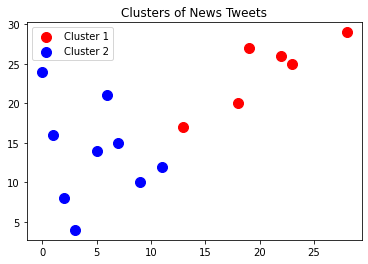

In [15]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of News Tweets')
plt.legend()
plt.show()

# 2) Expectation Maximization 

Text(0.5, 0.92, 'Gaussian Mixture Model')

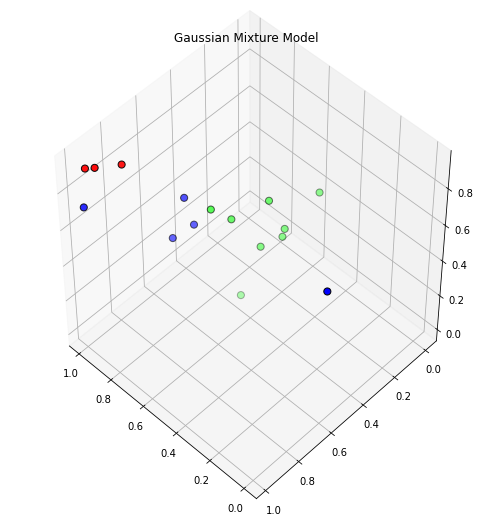

In [16]:
# Expectation Maximization uging Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(dist)
proba_lists = gmm.predict_proba(dist)
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(dist[:, 0], dist[:, 1], dist[:, 2],c=colored_tuples, edgecolor="k", s=50)
plt.title("Gaussian Mixture Model") 


# Q2

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dataset=pd.read_csv("diabetes_simplied.csv")

In [19]:
dataset.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


In [21]:
X=dataset.iloc[:,0:4].values
X

array([[148. ,  72. ,   0. ,  33.6],
       [ 85. ,  66. ,   0. ,  26.6],
       [183. ,  64. ,   0. ,  23.3],
       ...,
       [121. ,  72. , 112. ,  26.2],
       [126. ,  60. ,   0. ,  30.1],
       [ 93. ,  70. ,   0. ,  30.4]])

In [22]:
y=dataset.iloc[:,5].values

In [23]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

# 1) Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy') 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import f1_score, r2_score,accuracy_score, roc_curve, auc 

# F1-Score, R2-Score and Accuracy

In [39]:
print('F1-score: ',f1_score(y_test,y_pred))
print('R2-score: ', r2_score(y_test,y_pred))
print('Accuracy score: ', accuracy_score(y_test,y_pred))

F1-score:  0.5222222222222221
R2-score:  -0.5119047619047623
Accuracy score:  0.6614173228346457


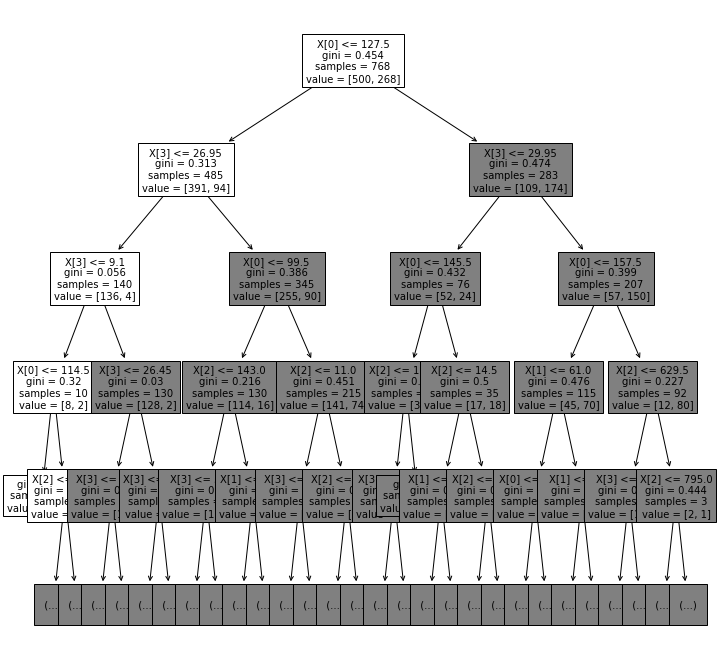

In [40]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf.fit(X, y), max_depth=4, fontsize=10)
plt.show()

In [41]:
#ROC and AUC Curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred = classifier.predict_proba(X_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
print('AUC Score: %.2f' % auc)

AUC Score: 0.63


In [42]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC(Decision Tree)')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

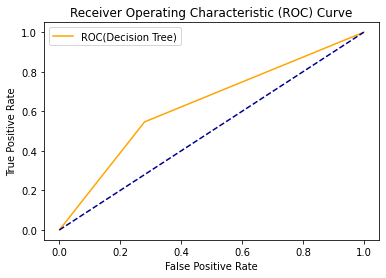

In [43]:
plot_roc_curve(fpr, tpr)

# 2) AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier 
classifier1 = AdaBoostClassifier(n_estimators=100,random_state=0)
classifier1.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [45]:
y_pred1=classifier1.predict(X_test)

# F1-Score, R2-Score and Accuracy

In [46]:
print('F1-score: ',f1_score(y_test,y_pred1))
print('R2-score: ', r2_score(y_test,y_pred1)) 
print('Accuracy score: ', accuracy_score(y_test,y_pred1))

F1-score:  0.5647058823529412
R2-score:  -0.30094130675526065
Accuracy score:  0.7086614173228346


In [47]:
#ROC and AUC Curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred1 = classifier1.predict_proba(X_test)
y_pred1 = y_pred1[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred1)
auc1 = roc_auc_score(y_test,y_pred1)
print('AUC Score: %.2f' % auc)

AUC Score: 0.63


In [48]:
def plot_roc_curve(fpr1, tpr1):
    plt.plot(fpr1, tpr1, color='green', label='ROC(AdaBoost)')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

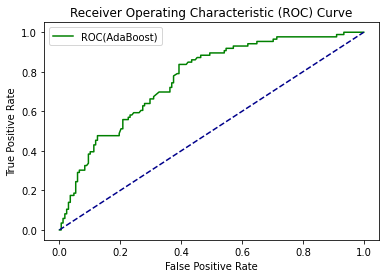

In [49]:
plot_roc_curve(fpr1, tpr1)

# Comparision of ROC Curves of Decision Tree and AdaBoost

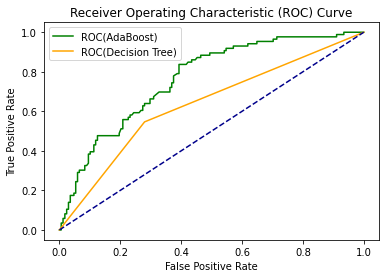

In [38]:
plt.plot(fpr1, tpr1, color='green', label='ROC(AdaBoost)')
plt.plot(fpr, tpr, color='orange', label='ROC(Decision Tree)')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()